<p style="color:black; font-size:35px; font-weight:bold">DSML Projet: PCOS Prediction</p>



<p style="color:black; font-size:25px; font-weight:bold">Introduction to PCOS</p>


Polycystic ovary syndrome (PCOS) is a common hormonal condition that affects women of reproductive age. It usually starts during adolescence, but symptoms may fluctuate over time.

PCOS can cause hormonal imbalances, irregular periods, excess androgen levels and cysts in the ovaries. Irregular periods, usually with a lack of ovulation, can make it difficult to become pregnant. PCOS is a leading cause of infertility.

PCOS is a chronic condition and cannot be cured. However, some symptoms can be improved through lifestyle changes, medications and fertility treatments. 

The cause of PCOS is unknown but women with a family history or type 2 diabetes are at higher risk.

PCOS a significant public health problem and is one of the commonest hormonal disturbances affecting women of reproductive age. The condition affects an estimated 8–13% of women of reproductive age, and up to 70% of cases are undiagnosed.

The prevalence of PCOS is higher among some ethnicities and these groups often experience more complications, in particular related to metabolic problems.

The biological and psychological effects of PCOS, particularly those related to obesity, body image and infertility, can lead to mental health challenges and social stigma.

Early recognition and detection of “at risk” PCOS cases in adolescent girls can prevent complications such as obesity, insulin resistance, diabetes, infertility, and cardiovascular issues later in life.

**In this project, we will be predicting whether a patient has PCOS Syndrome or not with the help of Linear Models (Logistic Regression and SVM) and Non-Linear Models (Naive Bayes and Random Forest)**

<p style="color:black; font-size:30px; font-weight:bold">Importing Libraries and the dataset</p>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

df = pd.read_excel(r"C:\Users\pc\Downloads\PCOS_data_without_infertility.xlsx", sheet_name=1)

In [4]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


<p style="color:black; font-size:30px; font-weight:bold">Knowing our Dataset</p>


The dataset has been taken from Kaggle. Link for the dataset is: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset

* **Patient File No.** : This is the report number which has data for a particular patient
* **PCOS** : Polycystic ovary syndrome (PCOS) is a **hormonal disorder** common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
* **Age (yrs)** : Age of patient in years
* **Weight (Kg)** : Weight of patient in kg
* **Height(Cm)** : Height of patient in centimeter
* **BMI** : Body mass index of the patient
* **Blood Group** : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
* **Pulse rate(bpm)** : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
* **RR (breaths/min)** : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
* **Hb(g/dl)** : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
* **Cycle(R/I)** : ....
* **Cycle length(days)** : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
* **Marraige Status (Yrs)** : Years of marriage
* **Pregnant(Y/N)** : If the patient is pregnant 
* **No. of aborptions** : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
* **I   beta-HCG(mIU/mL)** : this is case 1 of beta hcg
* **II    beta-HCG(mIU/mL)** : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)
* **FSH(mIU/mL)** : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L) 
* **LH(mIU/mL)** : It is Luteinizing Hormone.
* **FSH/LH** : Ratio of FSH and LH 
* **Hip(inch)** : Hip size in inches 
* **Waist(inch)** : Waist Size in inches 
* **Waist:Hip Ratio** : Waist by hip ratio 
* **TSH (mIU/L)** : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L  
* **AMH(ng/mL)** : It is Anti-Mullerian Hormone. 
* **PRL(ng/mL)** : This represents Prolactin levels.
* **Vit D3 (ng/mL)**: Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults. 
* **PRG(ng/mL)**:  Progesterone levels
* **RBS(mg/dl)**: This value is obtained by doing Random Blood Sugar (RBS) Test.
* **Weight gain(Y/N)**: Is there been a weight gain
* **hair growth(Y/N)**: Is there been a hair growth
* **Skin darkening (Y/N)**: Skin darkening issues
* **Hair loss(Y/N)**: hair loss issues
* **Pimples(Y/N)**: pimples issues
* **Fast food (Y/N)**: is fast food part of you diet
* **Reg.Exercise(Y/N)**: do you do exercises on a regular basis
* **BP _Systolic (mmHg)**: Systolic blood pressure, measures the pressure in your arteries when your heart beats.
* **BP _Diastolic (mmHg)**: Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.
* **Follicle No. (L)**: Follicles number in the left side
* **Follicle No. (R)**: Follicles number in the right side
* **Avg. F size (L) (mm)**: Average Follicle size in the left side in mm
* **Avg. F size (R) (mm)**: Average Follicle size in the right side in mm
* **Endometrium (mm)**: Size of Endometrium in mm

<p style="color:black; font-size:30px; font-weight:bold">Data Preprocessing</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
#converting object datatype to numeric
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") 

In [8]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip()) 

In [9]:
#dropping not useful axis
df = df.drop(['Unnamed: 44'], axis = 1)
df = df.drop(['Sl. No'], axis = 1)
df = df.drop(['Patient File No.'], axis = 1)

In [10]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


<AxesSubplot:>

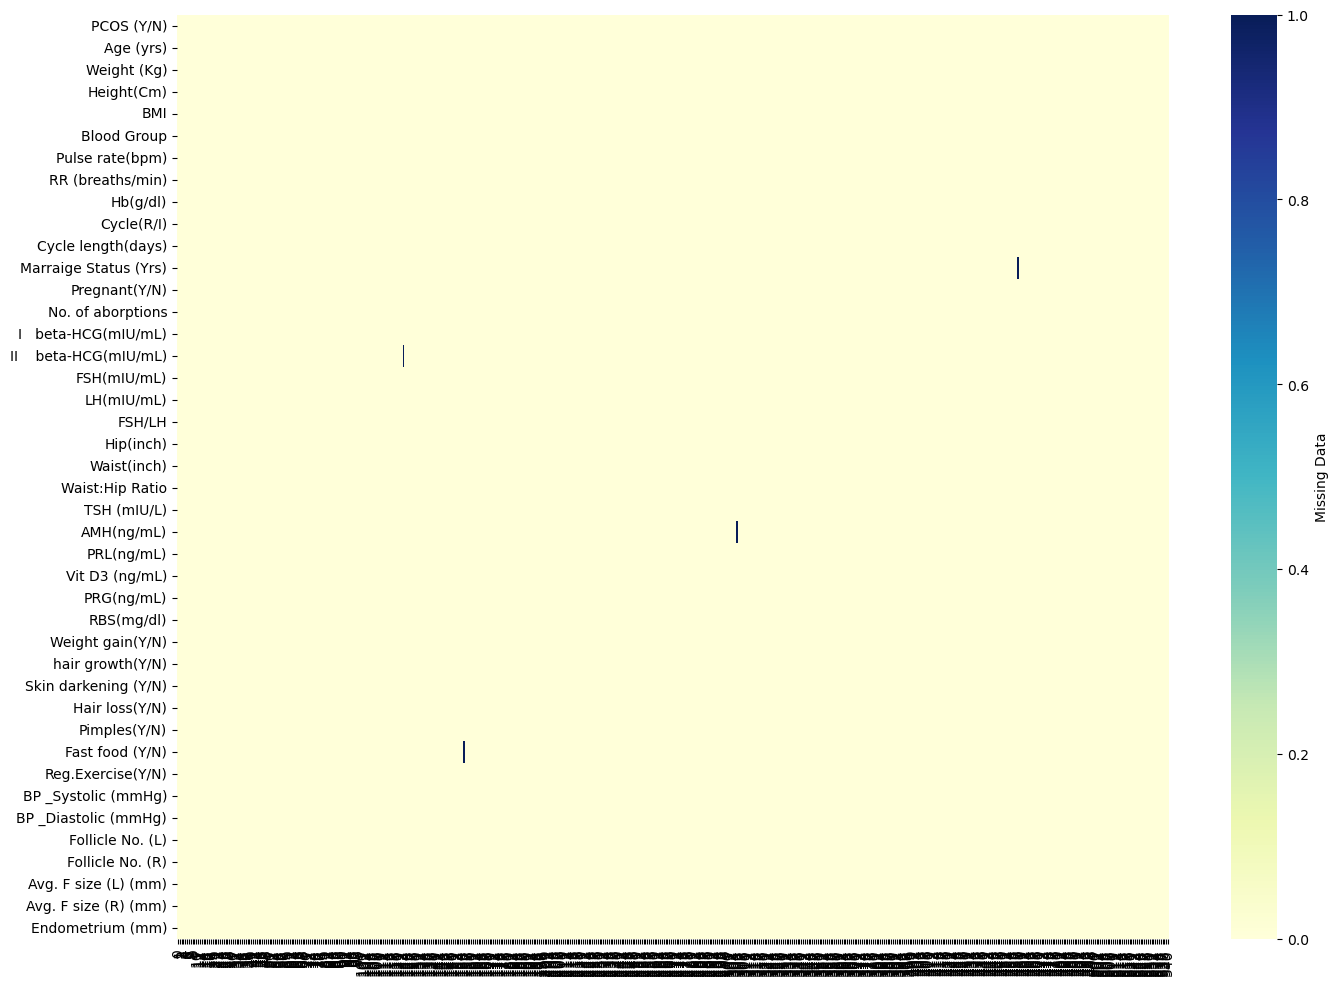

In [11]:
#Plotting heatmap to visualize any missing values
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)

In [12]:
#finding columns with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [13]:
#filling columns with missing value with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median())

<p style="color:black; font-size:30px; font-weight:bold">Visualization</p>

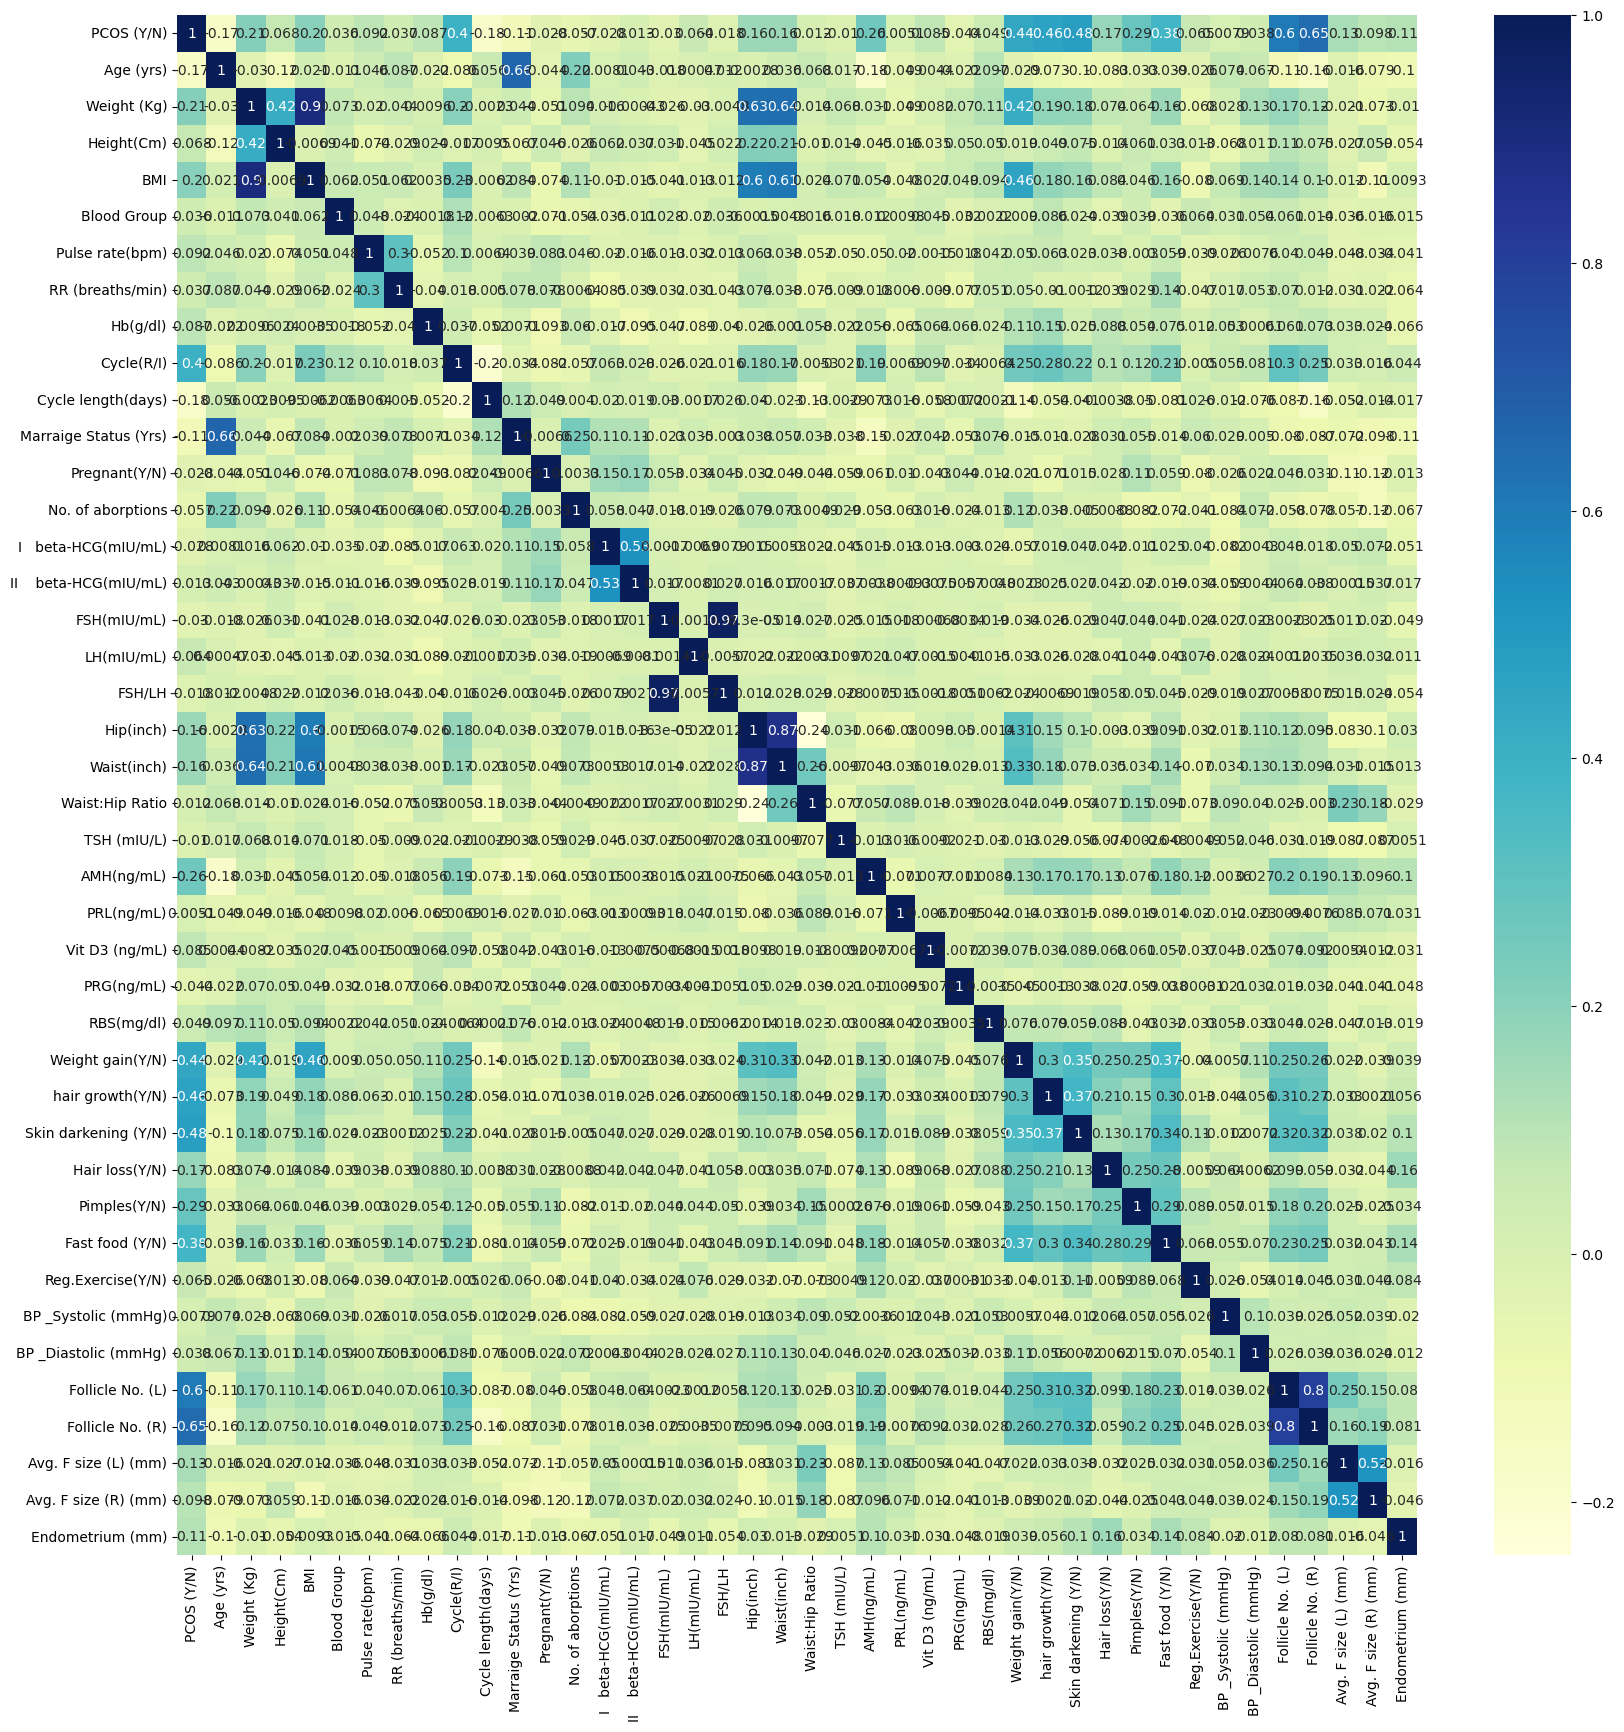

In [14]:
# plotting correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
# printing correlation of "PCOS (Y/N)" to different fields(sorted in descending order)
df.corr()["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

In [16]:
# identifying categorical and numerical features in dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [17]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [18]:
numerical_variables

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

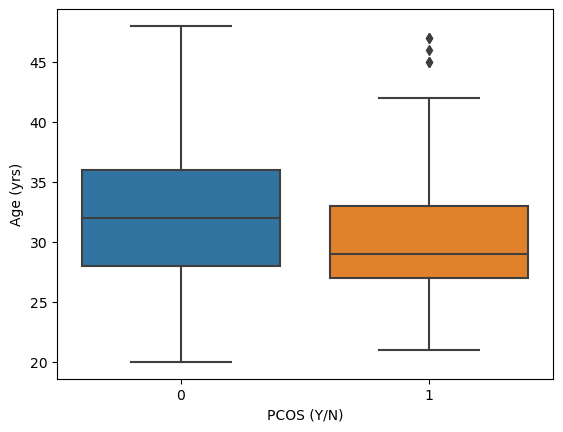

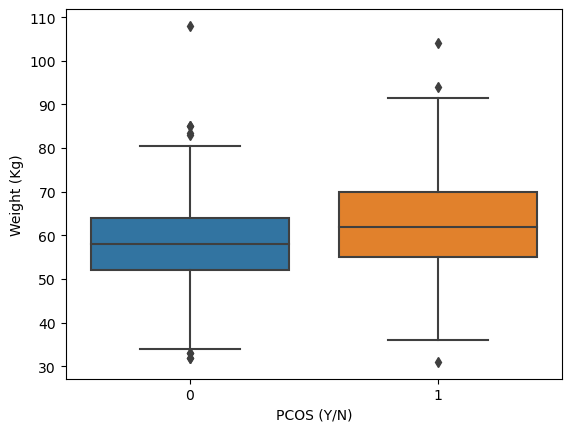

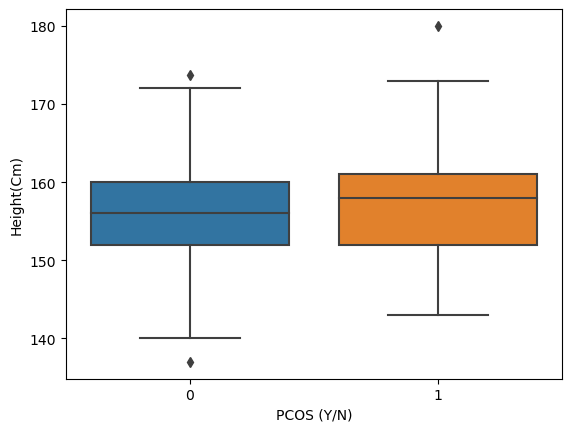

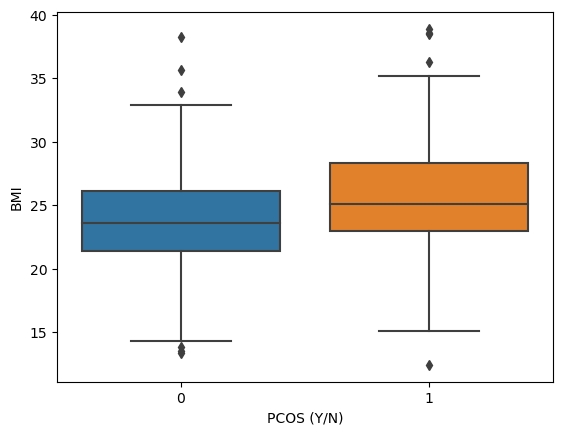

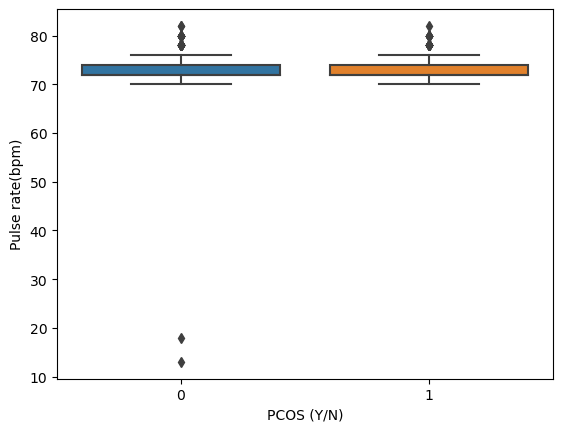

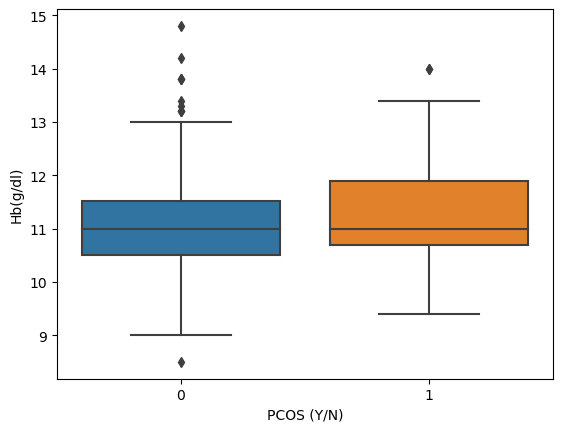

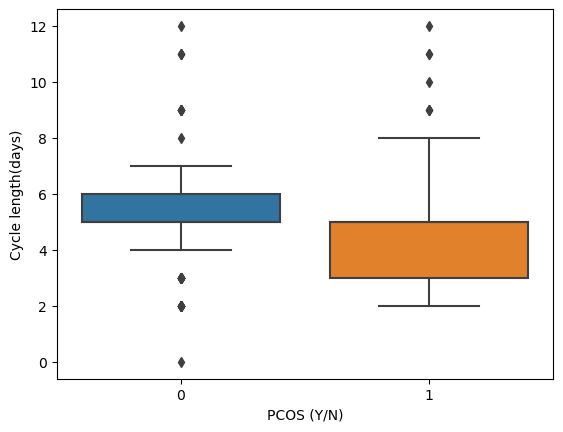

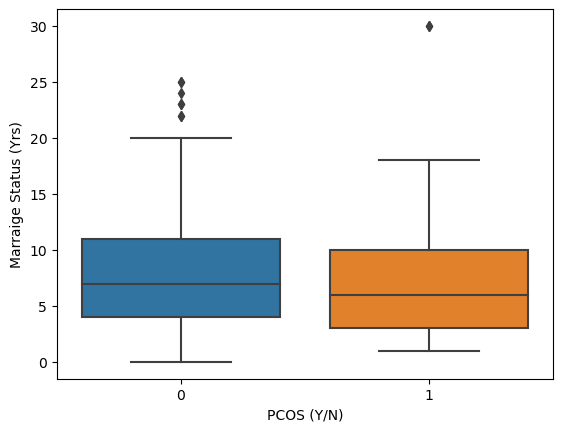

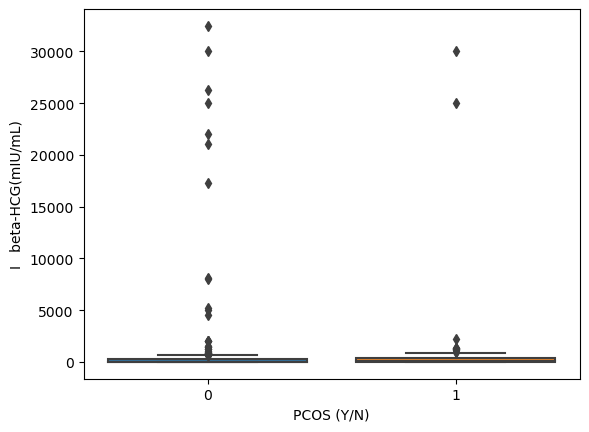

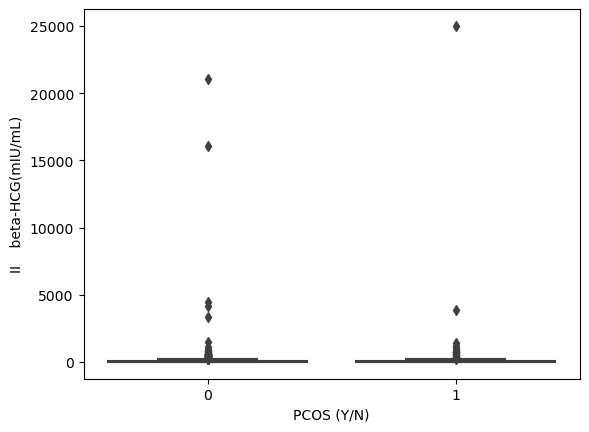

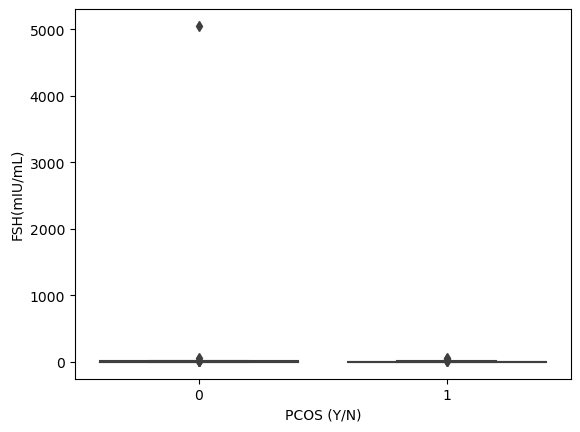

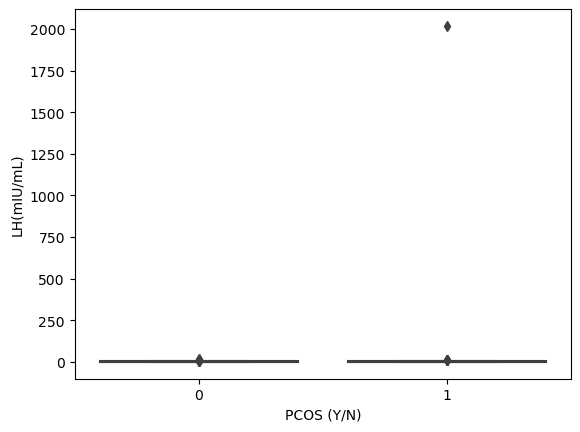

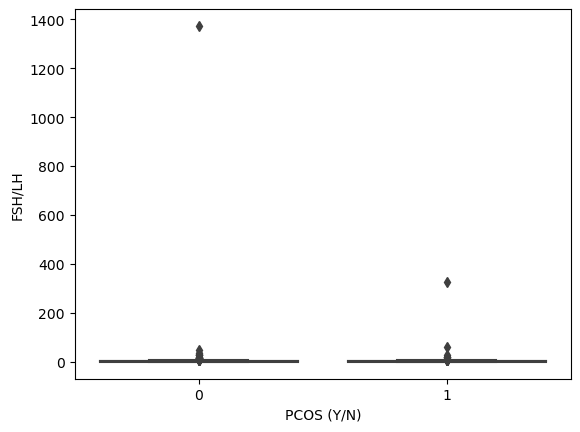

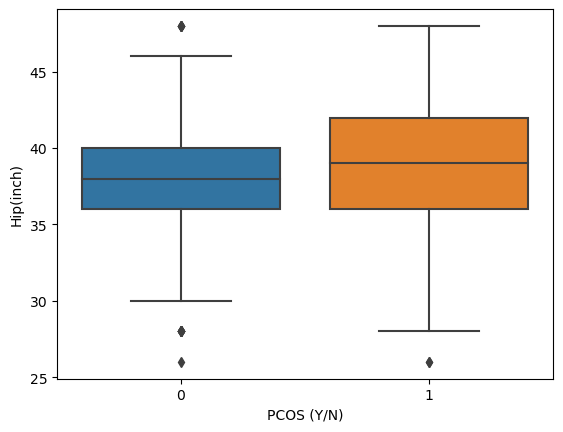

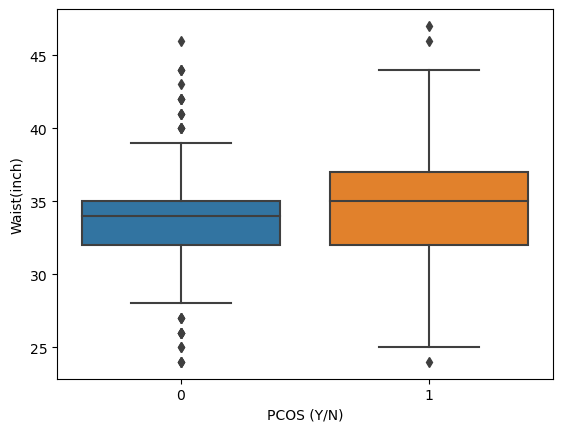

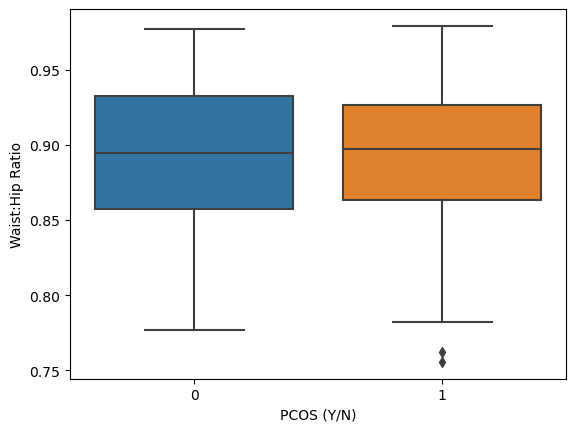

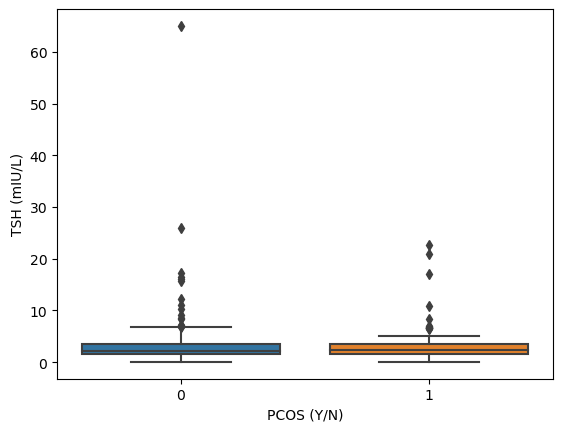

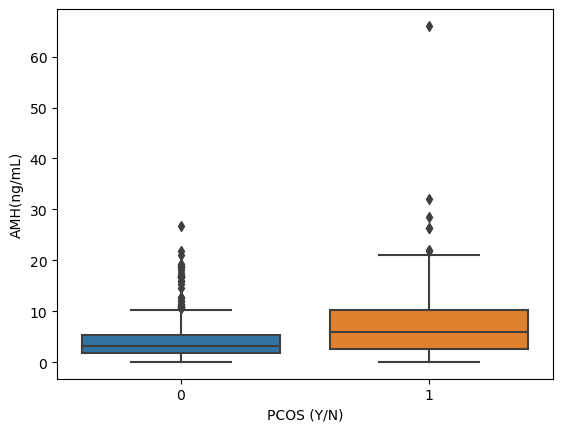

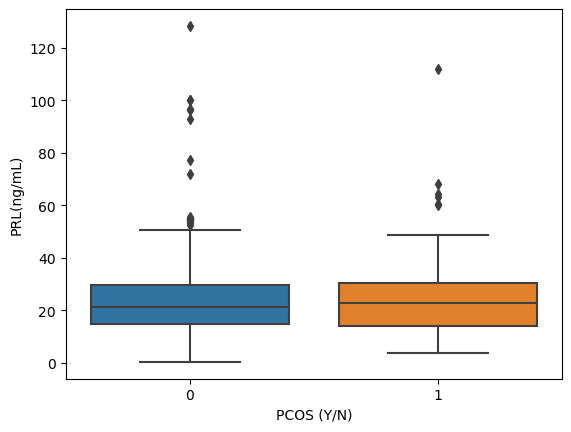

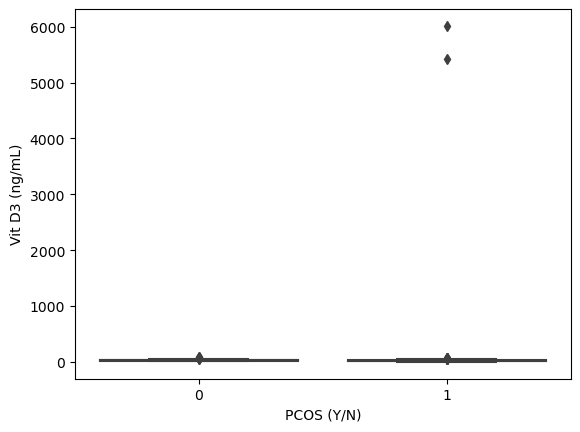

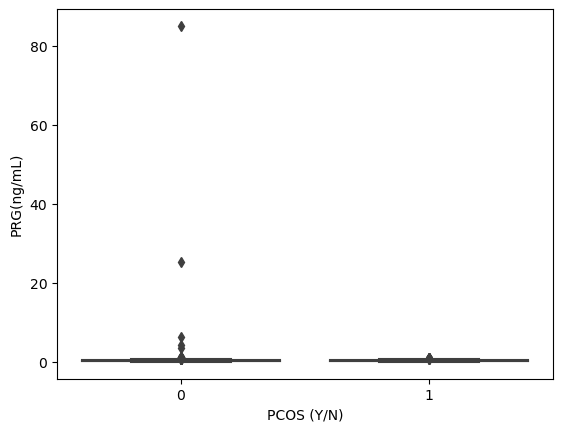

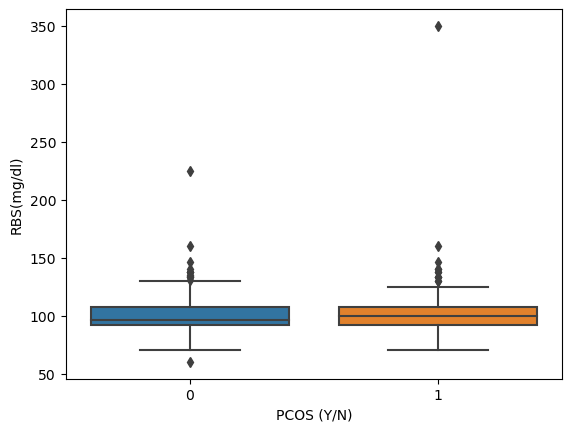

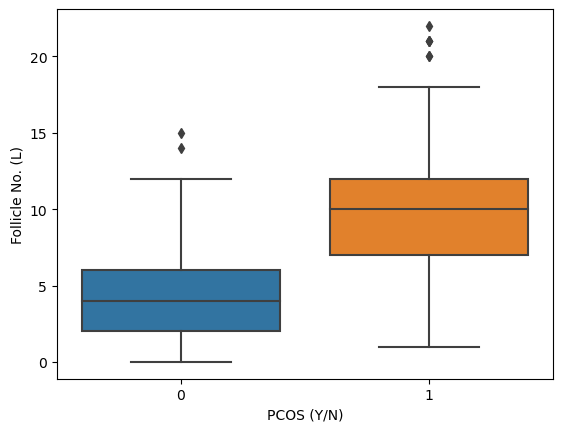

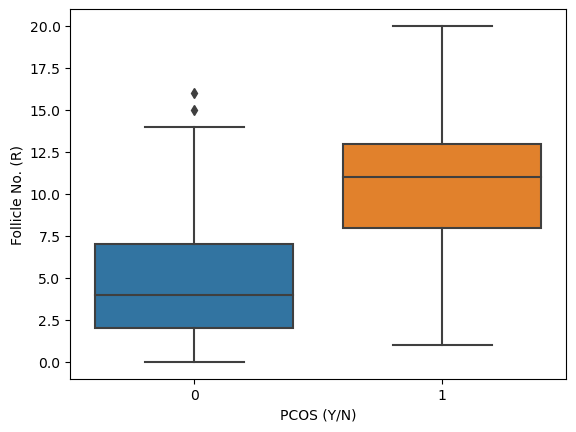

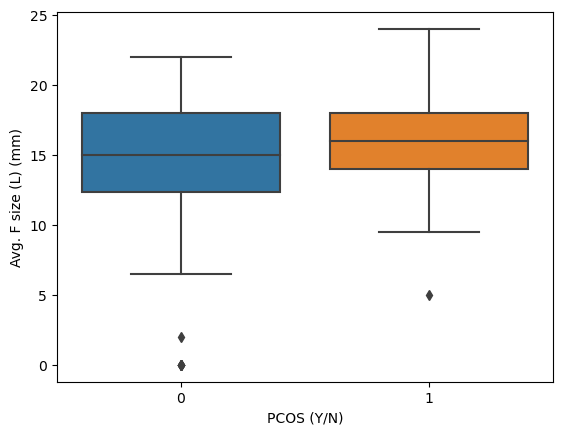

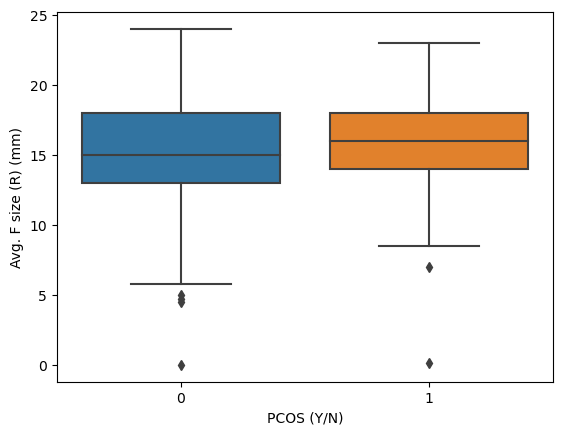

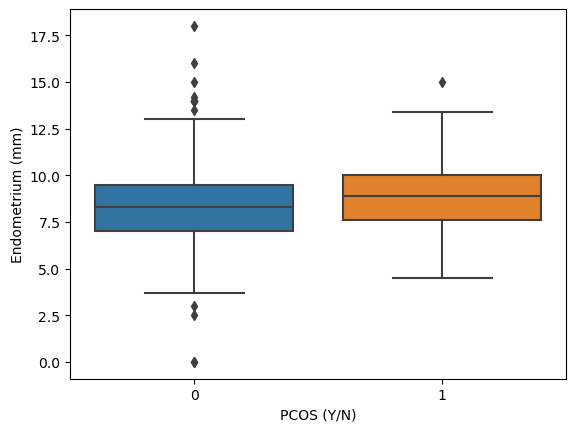

In [19]:
# Plotting box-plot for numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df)
    plt.show()

### Observations from boxplot
* higher the follicle number more the tendancy of PCOS
* patients with lower cycle lengths means more tendancy of PCOS
* the average age of patients diagnosed with PCOS is 30 years

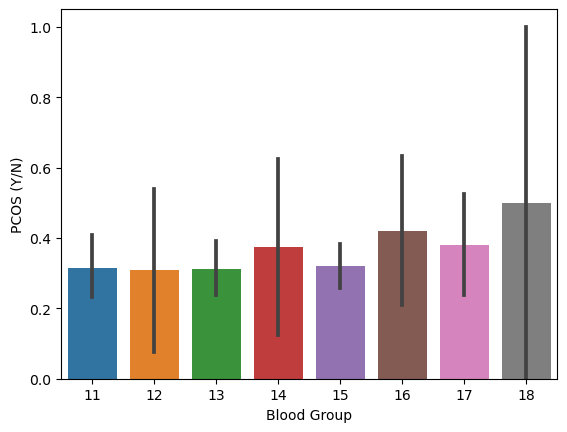

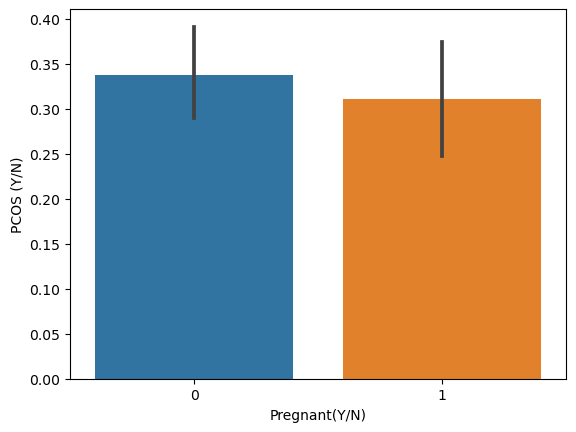

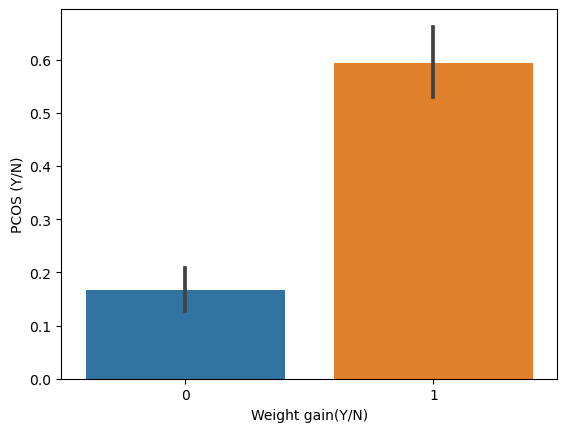

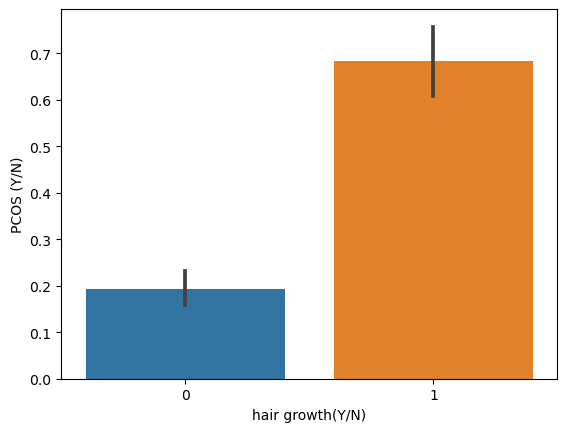

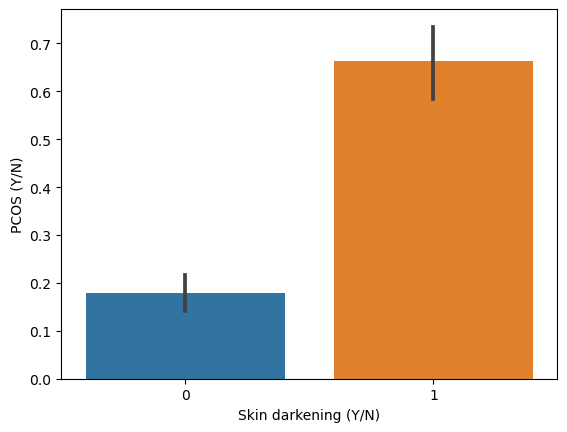

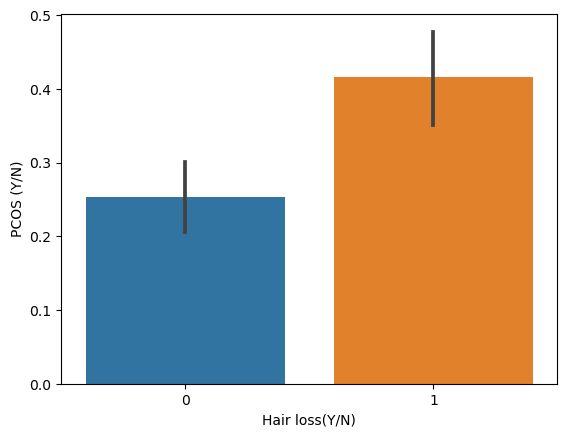

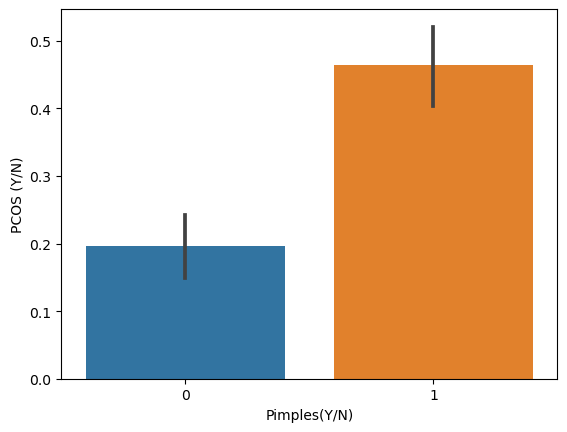

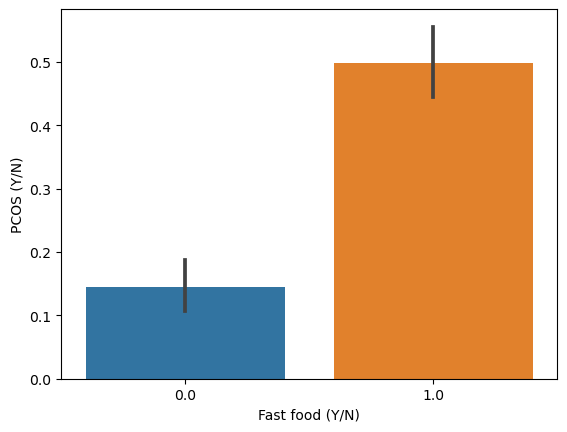

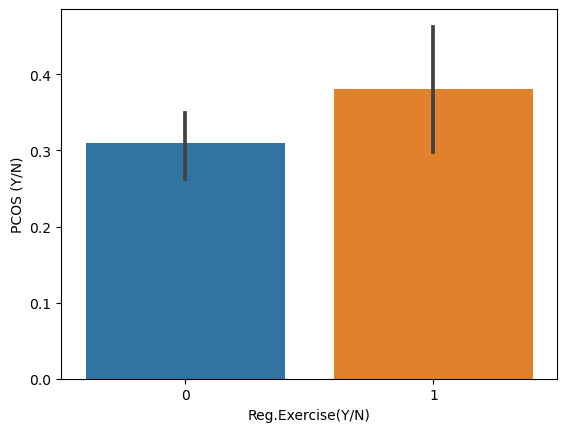

In [20]:
# Plotting bar-plot for categorical variables
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = df)
        plt.show()

### Observations from barplot
Weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS<br>
**So the above can also be termed as symptoms of PCOS**

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

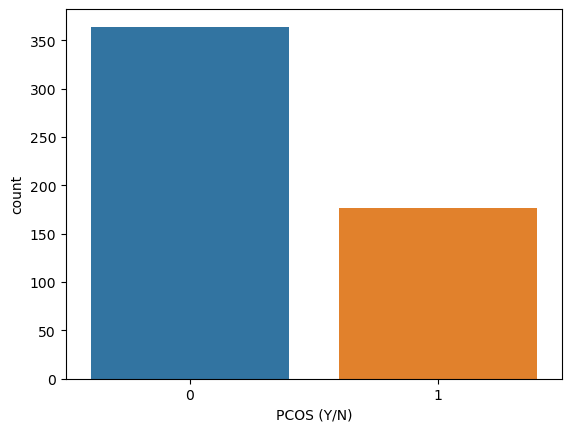

In [21]:
sns.countplot(x = "PCOS (Y/N)", data = df)

In [22]:
df["PCOS (Y/N)"].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [23]:
177/(364 + 177)*100

32.71719038817005

This means that 32.71 % of patients in our dataset are those having PCOS syndrome.

<p style="color:black; font-size:30px; font-weight:bold">Classification using Logistic Regression</p>

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors.

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

### Formula for Logistic Regression

$$σ(x) = \frac{ 1 }{ 1+e^{-z} } = \frac{ 1 }{ 1+e^{-(\beta_{0} + \beta_{1}x)} }$$

In [26]:
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

print('\ny_pred : \n',y_pred)

Accuracy of logistic regression classifier on test set: 0.84

The confusion Matrix is : 
 [[101   8]
 [ 18  36]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       109
           1       0.82      0.67      0.73        54

    accuracy                           0.84       163
   macro avg       0.83      0.80      0.81       163
weighted avg       0.84      0.84      0.84       163


y_pred : 
 [0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Therefore, the f1-score is 0.84**

<p style="color:black; font-size:30px; font-weight:bold">Classification using SVM</p>

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

In [41]:
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

print('\ny_pred : \n',y_pred)

Accuracy of SVM classifier on test set: 0.67

The confusion Matrix is : 
 [[109   0]
 [ 54   0]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       109
           1       0.00      0.00      0.00        54

    accuracy                           0.67       163
   macro avg       0.33      0.50      0.40       163
weighted avg       0.45      0.67      0.54       163


y_pred : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Therefore, the f1-score is 0.67**

<p style="color:black; font-size:30px; font-weight:bold">Classification using Naive Bayes</p>

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. To start with, let us consider a dataset.

One of the most simple and effective classification algorithms, the Naïve Bayes classifier aids in the rapid development of machine learning models with rapid prediction capabilities.

Naïve Bayes algorithm is used for classification problems. It is highly used in text classification. In text classification tasks, data contains high dimension (as each word represent one feature in the data). It is used in spam filtering, sentiment detection, rating classification etc. The advantage of using naïve Bayes is its speed. It is fast and making prediction is easy with high dimension of data.

### Formula for Naive Bayes

$$P(A|B) = \frac{ P(B|A) * P(A) }{ P(B) }$$

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

print('\ny_pred : \n',y_pred)

Accuracy of Naive Bayes classifier on test set: 0.83

The confusion Matrix is : 
 [[101   8]
 [ 20  34]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       109
           1       0.81      0.63      0.71        54

    accuracy                           0.83       163
   macro avg       0.82      0.78      0.79       163
weighted avg       0.83      0.83      0.82       163


y_pred : 
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


**Therefore, the f1-score is 0.83**

<p style="color:black; font-size:30px; font-weight:bold">Classification using Random Forest</p>

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

print('\ny_pred : \n',y_pred)

Accuracy of Random Forest classifier on test set: 0.91

The confusion Matrix is : 
 [[106   3]
 [ 11  43]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       109
           1       0.93      0.80      0.86        54

    accuracy                           0.91       163
   macro avg       0.92      0.88      0.90       163
weighted avg       0.92      0.91      0.91       163


y_pred : 
 [0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


**Therefore, the f1-score is 0.90 which is quite close to 1**

<p style="color:black; font-size:30px; font-weight:bold">Comparison and Results</p>

C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Temp\ipykernel_24592\474525334.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
  false_discovery_rate = fp / (fp + tp)


                                  Logistic Regression       SVM  Naive Bayes  \
Accuracy                                     0.840491  0.668712     0.828221   
Precision                                    0.818182  0.000000     0.809524   
Recall                                       0.666667  0.000000     0.629630   
F1 Score                                     0.734694  0.000000     0.708333   
Sensitivity                                  0.666667  0.000000     0.629630   
Specificity                                  0.926606  1.000000     0.926606   
False Positive Rate                          0.073394  0.000000     0.073394   
False Negative Rate                          0.333333  1.000000     0.370370   
Negative Predictive Value                    0.848739  0.668712     0.834711   
False Discovery Rate                         0.181818       NaN     0.190476   
Matthews Correlation Coefficient             0.629020  0.000000     0.598620   

                                  Rando

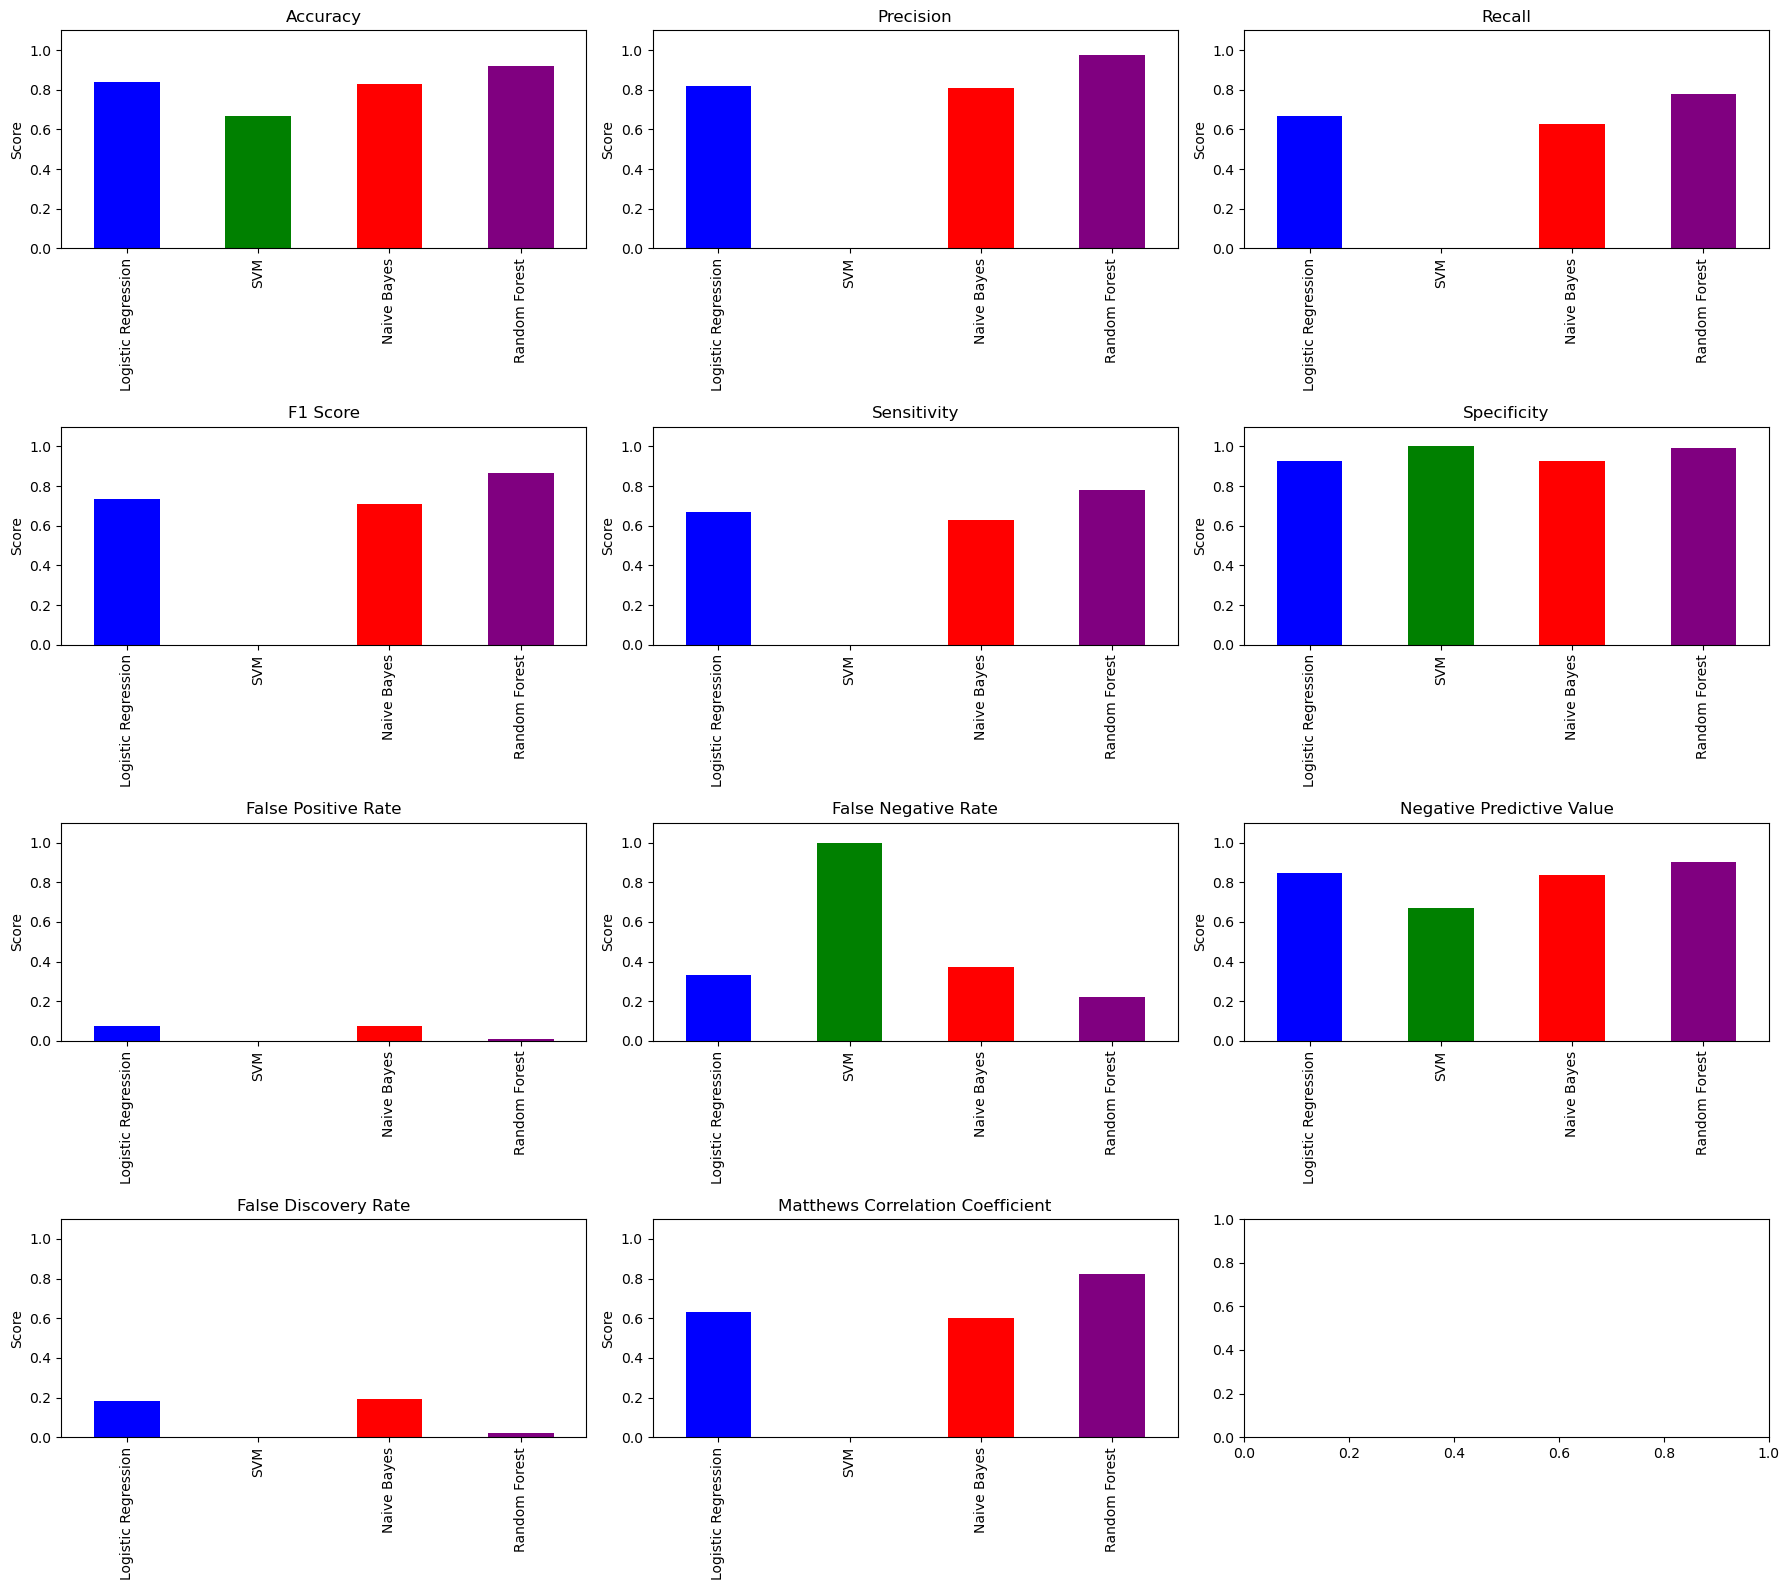

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef)

y_test = y_test
y_preds = {
    'Logistic Regression': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
                            0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 
                            0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 
                            0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 
                            0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    'SVM': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Naive Bayes': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 
                    0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 
                    1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 
                    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    'Random Forest': [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 
                      0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 
                      1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                      0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                      1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

def calculate_metrics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    negative_predictive_value = tn / (tn + fn)
    false_discovery_rate = fp / (fp + tp)
    mcc = matthews_corrcoef(y_test, y_pred)
    return [accuracy, precision, recall, f1, sensitivity, specificity, false_positive_rate, false_negative_rate, negative_predictive_value, false_discovery_rate, mcc]

# Compute metrics for each model
results = {}
for model_name, y_pred in y_preds.items():
    results[model_name] = calculate_metrics(y_test, y_pred)

# Create a DataFrame from the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Sensitivity', 'Specificity',
           'False Positive Rate', 'False Negative Rate', 'Negative Predictive Value',
           'False Discovery Rate', 'Matthews Correlation Coefficient']
df = pd.DataFrame(results, index=metrics)

# Display the results in a table
print(df)

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
for ax, metric in zip(axes.flatten(), metrics):
    df.loc[metric].plot(kind='bar', ax=ax, color=['blue', 'green', 'red', 'purple'])
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.1)  

plt.tight_layout()
plt.show()